# Implementação do KNN

In [1]:
import math
import time
from matplotlib import pyplot as plt
class KnnClustered:
    def __init__(self, graph, k):
        self.graph = graph
        self.k = k
        self.area = 1
        self.rounds = 5
        if(k >= graph.totalNodes):
            self.k = graph.totalNodes-1
        
    def __increaseArea(self):
            self.rounds += 1
            self.area = pow(2,self.rounds)
            
    def __resetArea(self):
        self.area = 1
    
    def __searchSpace(self,x, y):
        knn = set()
        #Define os limites superiores e inferiores da busca
        minX = 0
        maxX = self.graph.totalNodes
        minY = 0
        maxY = self.graph.totalNodes
        if (x - self.area) > 0:
            minX = x - self.area
        if (x + self.area) < maxX:
            maxX = x + self.area
        if (y - self.area) > 0:
            minY = y - self.area
        if (y + self.area) < maxY:
            maxY = y + self.area
        # Adiciona todos os nós da região na lista "neighbors"
        origin = ",".join((str(x),str(y)))
        for a in range(minX, maxX+1):
            for b in range(minY, maxY+1):
                nodeKey = ",".join((str(a),str(b)))
                knn.add(nodeKey)
        try:
            knn.remove(origin)
        except KeyError:
            pass
        return set(knn)
    
    def __minimumViableSet(self, x, y):
        self.__resetArea()
        nodes = set(grafo.nodes.keys()).intersection(self.__searchSpace(x, y))
        while len(nodes) < self.k:
            self.__increaseArea()
            nodes = set(grafo.nodes.keys()).intersection(self.__searchSpace(x, y))
        return list(nodes)
    
    def __euclidianDistance(self,x1,y1, x2, y2):
        x = abs(x2 - x1)
        y = abs(y2 - y1)
        return math.sqrt(pow(x,2) + pow(y,2))
    
    def __kNearestNeighbors(self, x, y):
        viableListWithDistance = dict()
        viableList = knn.__minimumViableSet(x, y)
        while len(viableList) > 0:
            nodeKey = viableList.pop()
            node = self.graph.nodes[nodeKey]
            distance = self.__euclidianDistance(x,y,node.x,node.y)
            viableListWithDistance[nodeKey] = distance
        return sorted(viableListWithDistance, key=viableListWithDistance.get)[:3]
    
    def Execute(self):
        tic = time.perf_counter()
        epoch = 0
        for key in self.graph.nodes:
            epoch += 1
            #print(epoch)
            source = self.graph.nodes[key]
            knn = self.__kNearestNeighbors(source.x, source.y)
            for n in knn:
                destination = self.graph.nodes[n]
                self.graph.addEdge(source, destination)
        toc = time.perf_counter()
        #print(f"Executed in {toc - tic:0.4f} seconds")
        timeval = toc - tic
        return timeval
    

# População do grafo e teste do algoritmo

In [2]:
import random
from src.classes.graph import Graph
from src.classes.node import Node

In [3]:
def populateGraph(graph,n, seed):
    random.seed(seed)
    xValues = random.sample(range(0, n+1), n)
    yValues = random.sample(range(0, n+1), n)
    for i in range(len(xValues)):
        nodeKey = ",".join((str(xValues[i]),str(yValues[i])))
        node = Node(nodeKey, xValues[i], yValues[i])
        graph.addVertex(node)

In [41]:
grafo = Graph(nodeType=Node)
populateGraph(grafo, 10, 200)

In [36]:
knn = KnnClustered(grafo, 3)

In [37]:
tempo = knn.Execute()

In [8]:
executionTime = []
for a in range(100):
    grafo = Graph(nodeType=Node)
    populateGraph(grafo, a+1, 200)
    knn = KnnClustered(grafo, 3)
    timeval = knn.Execute()
    executionTime.append(timeval)

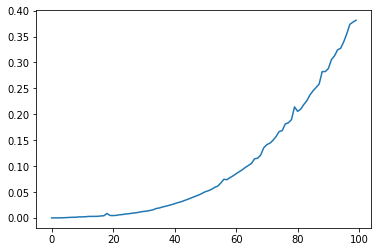

In [9]:
plt.plot(executionTime)

# Alternativa mais viavel do que a anterior

In [19]:
from sklearn.neighbors import kneighbors_graph

In [55]:
import numpy as np
n = 10
nodes = list()
random.seed(200)
xValues = random.sample(range(0, n+1), n)
yValues = random.sample(range(0, n+1), n)
for i in range(len(xValues)):
    nodes.append([xValues[i], yValues[i]])
X = np.array(nodes)
A = kneighbors_graph(X, 3, mode='connectivity')
A.toarray()

array([[0., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.]])

In [6]:
nodes

NameError: name 'nodes' is not defined

In [7]:
grafo.printGraph()

0,0
0,0 -> 4,3
0,0 -> 6,2
0,0 -> 7,1
3,7
3,7 -> 5,8
3,7 -> 2,9
3,7 -> 4,3
10,4
10,4 -> 8,5
10,4 -> 7,1
10,4 -> 6,2
10,4 -> 9,10
2,9
2,9 -> 3,7
2,9 -> 5,8
2,9 -> 4,3
4,3
4,3 -> 0,0
4,3 -> 3,7
4,3 -> 2,9
4,3 -> 6,2
4,3 -> 7,1
7,1
7,1 -> 0,0
7,1 -> 10,4
7,1 -> 4,3
7,1 -> 6,2
7,1 -> 8,5
8,5
8,5 -> 10,4
8,5 -> 7,1
8,5 -> 6,2
8,5 -> 9,10
8,5 -> 5,8
9,10
9,10 -> 5,8
9,10 -> 8,5
9,10 -> 10,4
5,8
5,8 -> 3,7
5,8 -> 2,9
5,8 -> 9,10
5,8 -> 8,5
6,2
6,2 -> 0,0
6,2 -> 10,4
6,2 -> 4,3
6,2 -> 7,1
6,2 -> 8,5


In [8]:
plt.scatter(xValues, yValues)

NameError: name 'xValues' is not defined

# Implementação do A*

In [9]:
import heapq
class Heap:
    def __init__(self):
        self.priorityQueue = list()
        
    def push(self, elem):
        heapq.heappush(self.priorityQueue, elem)
        
    def pop(self):
        return heapq.heappop(self.priorityQueue)
    
    def empty(self):
        return True if len(self.priorityQueue) == 0 else False

In [38]:
class AStarSearch:
    def __init__(self, graph):
        self.graph = graph
        self.open = Heap()
        self.localCost = dict()
        self.path = dict()
        
    def __euclidean(self, dest, origin):
        x = abs(dest.x - origin.x)
        y = abs(dest.y - origin.y)
        return math.sqrt(pow(x,2) + pow(y,2))
    
    def execute(self, originKey, destKey):
        node = self.graph.nodes[originKey]
        dest = self.graph.nodes[destKey]
        path = self.__searchPath(node, dest)
        return path
    
    # A* algorithm
    def __searchPath(self, origin, dest):
        self.open.push((0, origin))
        self.localCost[origin.key] = 0
        self.path[origin.key] = None
        while not self.open.empty():
            current = self.open.pop()
            distance = current[0]
            node = current[1]
            if node.key == dest.key:
                break
            for childKey in self.graph.edges[node.key]:
                cost = self.localCost[node.key] + self.__euclidean(node, dest)
                if childKey not in self.localCost or cost < self.localCost[childKey]:
                    self.localCost[childKey] = cost
                    childNode = self.graph.nodes[childKey]
                    totalCost = cost + self.__euclidean(dest, childNode)
                    self.open.push((totalCost, childNode))
                    self.path[childKey] = node.key
            if self.open.empty() and node.key != dest.key:
                return list()
        last = dest.key
        reconstructedPath = list()
        reconstructedPath.append(last)
        while last != origin.key:
                last = self.path[last]
                reconstructedPath.append(last)
        return reconstructedPath

In [7]:
from src.classes.aStar import AStarSearch

In [8]:
aStar = AStarSearch(grafo)
path = aStar.execute("0,0", "5,8")

In [9]:
path

['5,8', '3,7', '4,3', '0,0']

In [23]:
import networkx as nx

In [56]:
G = nx.Graph(A)

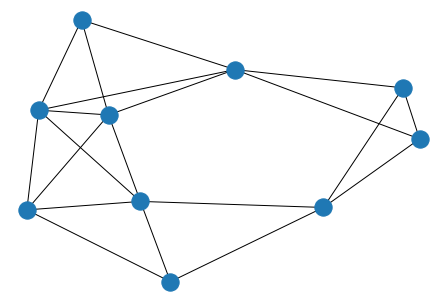

In [57]:
nx.draw(G)